In [ ]:
!pip install wandb
import wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading data

[(x_train, y_train), (x_test, y_test)] = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

print("Size of Training data:", x_train.shape)
print("Size of Validation data:", x_val.shape)
print("Size of Training labels:", y_train.shape)
print("Size of Validation labels:", y_val.shape)
print("Size of Test data:", x_test.shape)
print("Size of Test labels:", y_test.shape)

# Performing Scaling transformations on the data
X_scaled = x_train / 255
X_val_scaled = x_val / 255
X_test_scaled = x_test / 255

X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1]*X_scaled.shape[2]).T
X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1]*X_val_scaled.shape[2]).T
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1]*X_test_scaled.shape[2]).T

4422102/4422102 [==============================] - 0s 0us/step
Size of Training data: (48000, 28, 28)
Size of Validation data: (12000, 28, 28)
Size of Training labels: (48000,)
Size of Validation labels: (12000,)
Size of Test data: (10000, 28, 28)
Size of Test labels: (10000,)


In [ ]:
print("Size of Scaled Training data:", X_scaled.shape)
print("Size of Scaled Validation data:", X_val_scaled.shape)
print("Size of Scaled Test data:", X_test_scaled.shape)

Size of Scaled Training data: (784, 48000)
Size of Scaled Validation data: (784, 12000)
Size of Scaled Test data: (784, 10000)


# Activation functions with its derivatives

In [ ]:
import numpy as np

class Sigmoid():
# Initialize the Sigmoid function with parameters c and b
    def __init__(self, w=1, b=0):
        self.w = w
        self.b = b

# Calculate the sigmoid function value for input x
    def value(self, x):
        fun_val = 1 + np.exp(-self.w * (x + self.b))
        return 1 / fun_val

    def diff(self, x, remove=False):
        y = self.value(x)
        if remove:
  # Remove the last element from the array
            y = y[:-1]
  # Calculate the derivative of the sigmoid function with respect to x
        fun_val = self.w * y * (1 - y)
        return fun_val


class Tanh():
    def __init__(self):
        pass

    def value(self, x):
       # tanh(z) = (e^z - e^(-z)) / (e^z + e^(-z))
        return np.exp(x) - np.exp(-x)/np.exp(x) + np.exp(-x)

    def der_tanh(self, x):
        y = self.value(x)
        fun_val = 1 - y**2 # 1 - tanh(z)^2
        return fun_val

class Relu():
    def __init__(self):
        pass

    def value(self, x):
      # ReLU function: f(x) = max(0, x)
        fun_val = x
        fun_val[fun_val<0] = 0
        return fun_val

    def diff(self, x):
      # Derivative of the ReLU function: 1 for x > 0, 0 for x <= 0
        fun_val = np.ones(x.shape)
        fun_val[fun_val<=0] = 0
        return fun_val

class Softmax():
    def __init__(self):
        pass

    def value(self, x):
        fun_val = np.exp(x)/np.sum(np.exp(x), axis=0)
        # print("X shape", x.shape, "Val shape", val.shape)
        return fun_val

    def diff(self, x):
        y = self.value(x)
        matrix = np.tile(y, y.shape[0])
        print(y.shape, matrix.shape)
        fun_val = np.diag(y.reshape(-1,)) -(matrix * matrix.T)
        return fun_val


# Loss functions with its derivatives

In [ ]:
# Class for Cross Entropy Loss
class cross_entropy():
    def __init__(self):
        pass

    # Function to calculate cross entropy loss
    def find_loss(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        loss_pq = -np.sum(np.sum(self.y_pred*np.log(self.y_true)))
        return loss_pq

    # Function to calculate the derivative of cross entropy
    def diff(self):
        grad = -self.y_pred/(self.y_true)
        return grad

# Class for Squared Error Loss
class Squared_Error():
    def __init__(self):
        pass

    # Function to calculate squared error loss
    def find_loss(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        loss = np.sum((y_pred-y_true)**2)
        return loss

    # Function to calculate the derivative of squared error loss
    def diff(self, y_true, y_pred):
        grad = -2*(y_true - y_pred)
        return grad


# One Hot Encoder

In [ ]:
class OneHotEncoder():
    def __init__(self):
        self.num_classes = None

    def fit_transform(self, y, num_classes=None):
        if num_classes is not None:
            self.num_classes = num_classes
        else:
            # Find unique classes in the target variable
            self.num_classes = len(np.unique(y))

        # Initialize a zero matrix (num_classes, number of samples)
        transformed = np.zeros((self.num_classes, len(y)))

        # Set the corresponding element to 1 for each sample
        for i, j in enumerate(y):
            transformed[j, i] = 1  # Fixed i, j to j, i

        return transformed

    def inverse_transform(self, y):
        # Inverse transform: find the class with the highest value in each column
        y_class = np.argmax(y, axis=0)
        return y_class

# Example usage
# encoder = OneHotEncoder()

# y = np.array([0, 1, 2, 0, 1])
# # Fit and transform
# encoded = encoder.fit_transform(y)
# print("Encoded:\n", encoded)
# # Inverse transform
# decoded = encoder.inverse_transform(encoded)
# print("Decoded:", decoded)

## Input and Dense layers

In [ ]:

# from activations import Sigmoid, Tanh, Relu, Softmax
Dic_activations = {"Sigmoid":Sigmoid(), "Tanh":Tanh(), "Relu":Relu(), "Softmax":Softmax()}

class Input_Layer():
  def __init__(self, data):
    self.name = "Input"
    self.input = data
    self.size = self.input.shape[0]

    # Having the input as the activated output to be given to the next layer
    self.a = self.input
    self.type = "Input layer"

  def __repr__(self):
    # Return a string representation of the Input layer
    representation = f"{self.type} - of Size: {self.size}"
    return representation

class Dense_Layer:
    def __init__(self, size, activation, name, last=False):
        # Initialize Dense layer with specified size, activation function, and name
        self.name = name
        self.size = size
        # Map activation function string to actual function
        self.activation = Dic_activations.get(activation)
        if self.activation is None:
            raise ValueError(f"Activation function '{activation}' not supported.")
        self.activation_name = activation
        self.type = "Dense layer"

    def __repr__(self):
        # Return a string representation of the Dense layer
        representation = f"{self.type} - of Size: {self.size}; Activation: {self.activation_name}"
        return representation

# Example
input_layer = Input_Layer(np.array([1, 2, 3]))
dense_layer = Dense_Layer(size=5, activation='Relu', name='hidden_layer')
print(input_layer)
print(dense_layer)

Input layer - of Size: 3
Dense layer - of Size: 5; Activation: Relu


## Stochastic gradient descent(SGD)

In [ ]:

# learning rate = eta
class do_stochastic_gradient_descent():
    def __init__(self, eta=0.01):
# Initialize the SGD object with a learning rate.
        self.update = 0
        self.eta = eta

    def set_parameters(self, parameters):
       # Set the parameters of the SGD object, such as the learning rate.
        for key in parameters:
            setattr(self, key, parameters[key])

    def get_update(self, gradient):
       # Calculate the update for the parameters based on the gradient and learning rate.
        self.update = self.eta * gradient
        return self.update

# sgd = do_stochastic_gradient_descent(eta=0.01)
# parameters = {'param1': 2.0, 'param2': -1.0}
# sgd.set_parameters(parameters)
# gradient = 1.5
# update = sgd.get_update(gradient)
# print(update)

## Momentum based gradient descent


In [ ]:

class do_momentum_based_gradient_descent():
    def __init__(self, eta=0.01, beta=0.9):
       # Initialize the MomentumSGD with a learning rate (eta) and momentum term (beta).
        self.update = 0
        self.eta = eta
        self.beta = beta

    def set_parameters(self, parameters):
       # Set the parameters, such as learning rate and momentum(beta).
        for key in parameters:
            setattr(self, key, parameters[key])

    def get_update(self, gradient):
        self.update = self.beta * self.update + self.eta * gradient
        return self.update


## Nesterov Accelerated Gradient Descent(NAG)

In [ ]:
class do_nesterov_accelerated_gradient_descent():
    def __init__(self, eta=0.001, beta=0.9):
        self.update = 0
        self.eta = eta
        self.beta = beta

    def set_parameters(self, **kwargs):
        # Set the parameters of the NAG object, learning rate, and momentum term.
        for key, value in kwargs.items():
            setattr(self, key, value)

    def get_update(self, W, gradient):
        # Calculate the NAG update for the parameters based on the current parameters (W), gradient, and momentum term.
        W_lookahead = W - self.beta * self.update

        grad_lookahead = gradient(W_lookahead)

        # Update the momentum term
        self.update = self.beta * self.update + self.eta * grad_lookahead

        # Update the parameters
        W = W - self.update

        return W


## Root Mean Square Propagation(RMSProp)

In [ ]:

class do_rmsprop():
    def __init__(self, beta=0.9, eta = 0.001, epsilon = 1e-8):
       # Initialize the RMSProp with a learning rate (eta), decay rate (beta), and epsilon.
        self.v = 0
        self.beta = beta
        self.eta = eta
        self.epsilon = epsilon

    def set_parameters(self, parameters):
       # Set the parameters
       # setattr: It allows you to set the value of an attribute on an object given its name as a string
        for key in parameters:
            setattr(self, key, parameters[key])

    def get_update(self, grad):

        self.v = self.beta * self.v + (1 - self.beta) * (grad ** 2)
        update = (self.eta / (self.v + self.epsilon) ** 0.5) * grad

        return update

## Adaptive Moment Estimation(Adam)

In [ ]:
class do_adam():
    def __init__(self, beta1=0.9, beta2=0.999, eta=0.001, epsilon=1e-8):
        # Initialize the Adam object with a learning rate (eta), beta1, beta2, and epsilon.
        self.m = 0
        self.v = 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.eta = eta
        self.epsilon = epsilon
        self.iter = 1

    def set_parameters(self, parameters):
        # Set the parameters of the Adam
        for key in parameters:
            setattr(self, key, parameters[key])

    def get_update(self, grad):
        # Update the decaying average of the gradient and squared gradient
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)

        # Correct the bias of the decaying averages
        m_corrected = self.m / (1 - self.beta1 ** self.iter)
        v_corrected = self.v / (1 - self.beta2 ** self.iter)

        # Apply the update to the parameters directly
        update = self.eta * m_corrected / (v_corrected + self.epsilon) ** 0.5
        self.iter += 1

        return update

## Nesterov-accelerated Adaptive Moment Estimation(NAdam)

In [ ]:
class do_nadam():
    def __init__(self, beta1=0.9, beta2=0.999, eta=0.001, epsilon=1e-8):
        self.m = 0
        self.v = 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.eta = eta
        self.epsilon = epsilon
        self.iter = 1

    def set_parameters(self, parameters):
        for key in parameters:
            setattr(self, key, parameters[key])

    def get_update(self, grad):
        # Update the decaying average of the gradient and square gradient
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)

        # Correct the bias of the decaying averages
        m_corrected = self.m / (1 - self.beta1 ** self.iter)
        v_corrected = self.v / (1 - self.beta2 ** self.iter)

        # Calculate the NAG term using the updated m_corrected value
        nag_term = self.beta1 * m_corrected + ((1 - self.beta1) / (1 - self.beta1 ** self.iter)) * grad

        update = self.eta * nag_term / (v_corrected + self.epsilon) ** 0.5
        self.iter += 1

        return update


In [ ]:
import math
from copy import deepcopy

from tqdm import tqdm


Dic_optimizers = {"SGD":do_stochastic_gradient_descent(), "Momentum_GD":do_momentum_based_gradient_descent(), "NAG":do_nesterov_accelerated_gradient_descent(), "RMS_Prop":do_rmsprop(), "Adam":do_adam(), "Nadam":do_nadam()}

Dic_losses = {"Squared_Error":Squared_Error(), "Cross_Entropy":cross_entropy()}

## FeedForward Neural Network

In [ ]:
class FeedForward_NeuralNetwork():
    def __init__(self, layers, batch_size, optimizer, initialization, epochs, target_data, loss, X_val=None, t_val=None, wandblogging=False, optimization_parameter=None, learningrate = 0.01):

        self.layers = layers
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.initialization = initialization
        self.epochs = epochs
        self.target_data = target_data
        self.loss_type = loss
        self.loss = Dic_losses[loss]
        self.wandblogging = wandblogging
        self.learningrate = learningrate
        self.batch_no = math.ceil(self.target_data.shape[1]/batch_size)

        if t_val is not None:
            self.X_val = X_val
            self.layers[0].a_val = X_val
            self.t_val = t_val


        #initalize optimizer
        self.parameter_initialization(optimizer, optimization_parameter)

    def parameter_initialization(self, optimizer, parameters):
        # Initialize the size of weights for each layer
        prev_layer_size = self.layers[0].size
        for layer in self.layers[1:]:
            layer.W_size = (layer.size, prev_layer_size)
            prev_layer_size = layer.size

            # making use of optimizer data
            layer.W_optimizer = deepcopy(Dic_optimizers[optimizer])
            layer.b_optimizer = deepcopy(Dic_optimizers[optimizer])
            # Code to set parameters


            if parameters:
                layer.W_optimizer.set_parameters(parameters)
                layer.b_optimizer.set_parameters(parameters)

        if self.initialization == "random":
            for layer in self.layers[1:]:
                layer.W = np.random.normal(loc=0, scale=1.0, size = layer.W_size)
                layer.b = np.zeros((layer.W_size[0], 1))

        elif self.initialization == "xavier":
            for layer in self.layers[1:]:

                scale = 1/max(1., (2+2)/2.)
                limit = math.sqrt(3.0 * scale)
                layer.W = np.random.uniform(-limit, limit, size=layer.W_size)
                layer.b = np.zeros((layer.W_size[0], 1))

###########################################################
##     Forward Propogation
###########################################################

    def forward_propogation(self):
        for i in range(1, len(self.layers)):
            # print("Layer:", i, self.layers[i].W.shape)
            # Pre-activation
            self.layers[i].h = self.layers[i].W @ self.layers[i-1].a - self.layers[i].b
            # Activation
            self.layers[i].a = self.layers[i].activation.value(self.layers[i].h)
            # Validation
            self.layers[i].h_val = self.layers[i].W @ self.layers[i-1].a_val - self.layers[i].b
            self.layers[i].a_val = self.layers[i].activation.value(self.layers[i].h_val)

        if self.loss_type == "Cross_Entropy":
            # Final sofmax activation
            self.layers[-1].y = Softmax().value(self.layers[-1].a)
            self.layers[-1].y_val = Softmax().value(self.layers[-1].a_val)
        else:
            self.layers[-1].y = self.layers[-1].a
            self.layers[-1].y_val = self.layers[-1].a_val

###########################################################
##     Backward Propogation
###########################################################

    def backward_propogation(self):
        # Initialize variables neesed to keep track of loss
        self.eta_hist = []
        self.loss_hist = []
        self.accuracy_hist = []
        self.loss_hist_val = []
        self.accuracy_hist_val = []
        self.loss = Squared_Error()
        flag = 0

        # Perform Backprop
        for ep in tqdm(range(self.epochs)):
            # Store learning rate, loss, and accuracy for training and validation sets
            self.eta_hist.append(self.layers[-1].W_optimizer.eta)   # Append the learning rate to history
            self.loss_hist.append(self.loss.find_loss(self.target_data, self.layers[-1].y))
            train_acc, val_acc = self.get_accuracy(validation=True) # Get training and validation accuracies
            self.accuracy_hist.append(train_acc) # Append here train accuracies
            self.loss_hist_val.append(self.loss.find_loss(self.t_val, self.layers[-1].y_val)) # Compute and append validation loss
            self.accuracy_hist_val.append(val_acc) # Append validation accuracies

            if self.wandblogging:
                wandb.log({
                            "step": ep, \
                            "loss:": self.loss_hist[-1]/self.target_data.shape[1], \
                            "accuracy": self.accuracy_hist[-1]/self.target_data.shape[1], \
                            "val_loss": self.loss_hist_val[-1]/self.t_val.shape[1], \
                            "val_accuracy": self.accuracy_hist_val[-1]/self.t_val.shape[1]
                        })

            # Iterate over each batch
            for batch in range(self.batch_no):
                # print("Batch:", batch)
                t_batch = self.target_data[:, batch*self.batch_size:(batch+1)*self.batch_size] # Select target data for the current batch
                y_batch = self.layers[-1].y[:, batch*self.batch_size:(batch+1)*self.batch_size] # Select output data
                self.y_batch = y_batch
                self.t_batch = t_batch

                # If loss increased from the previous epoch, adjust learning rate
                try:
                    if self.loss_hist[-1] > self.loss_hist[-2]:
                        for layer in self.layers[1:]:
                            layer.W_optimizer.set_parameters({"eta":self.optimizer.eta*0.5}) # Reduce learning rate
                            layer.b_optimizer.set_parameters({"eta":self.optimizer.eta*0.5})
                        flag = 1 # flag to indicate that lr was adjusted
                except:
                    pass

                # If lr was adjusted, break the loop
                if flag == 1:
                    break

                # Compute gradients and update parameters for the output layer
                self.layers[-1].a_grad = self.loss.diff(self.t_batch, self.y_batch) # gradient of loss wrt activation
                self.layers[-1].h_grad = self.layers[-1].a_grad * self.layers[-1].activation.diff(self.layers[-1].h[:, batch*self.batch_size:(batch+1)*self.batch_size]) # wrt pre-activation

                self.layers[-1].W_grad = self.layers[-1].h_grad @ self.layers[-2].a[:, batch*self.batch_size:(batch+1)*self.batch_size].T  # gradient of loss wrt weights
                self.layers[-1].W_update = self.layers[-1].W_optimizer.get_update(self.layers[-1].W_grad) # Get weight update using optimizer

                self.layers[-1].b_grad = -np.sum(self.layers[-1].h_grad, axis=1).reshape(-1,1)  # gradient of loss wrt biases
                self.layers[-1].b_update = self.layers[-1].b_optimizer.get_update(self.layers[-1].b_grad) # Get bias update using optimizer



                # Backpropogation for the remaining layers
                for i in range(len(self.layers[:-2]), 0, -1):
                    self.layers[i].a_grad = self.layers[i+1].W.T @ self.layers[i+1].h_grad
                    self.layers[i].h_grad = self.layers[i].a_grad * self.layers[i].activation.diff(self.layers[i].h[:, batch*self.batch_size:(batch+1)*self.batch_size])

                    self.layers[i].b_grad = -np.sum(self.layers[i].h_grad, axis=1).reshape(-1,1)
                    self.layers[i].W_grad = self.layers[i].h_grad @ self.layers[i-1].a[:, batch*self.batch_size:(batch+1)*self.batch_size].T

                    self.layers[i].W_update = self.layers[i].W_optimizer.get_update(self.layers[i].W_grad)
                    self.layers[i].b_update = self.layers[i].b_optimizer.get_update(self.layers[i].b_grad)

                # Update the weights and biases
                for i, layer in enumerate(self.layers[1:]):
                    layer.W = layer.W - layer.W_update
                    layer.b = layer.b - layer.b_update


                # forward propagation for the next iteration
                self.forward_propogation()

            # If learning rate was adjusted, break from the loop
            if flag == 1:
                break

####################################################################
##    Get_Accuracy and check_test methods, to describe the purpose and functionality of the code
####################################################################

    def get_accuracy(self, validation=False, print_values=False):
        encoder = OneHotEncoder()
        t_train = encoder.inverse_transform(self.target_data)
        y_train = encoder.inverse_transform(self.layers[-1].y)

        # Compute training accuracy
        acc_train = np.sum(t_train==y_train)

        if print_values:
            print("Accuracy of train data set:", acc_train)

        if validation:
            t_val = encoder.inverse_transform(self.t_val)
            y_val = encoder.inverse_transform(self.layers[-1].y_val)

            # Compute validation accuracy
            acc_val = np.sum(t_val==y_val)

            if print_values:
                print("Accuracy of Validation data set:", acc_val)
            return acc_train, acc_val
        return acc_train


    def check_test(self, X_test, t_test):
        # Set input data for the first layer
        self.layers[0].a_test = X_test

        # Forward pass for testing data
        for i in range(1, len(self.layers)):
            self.layers[i].h_test = self.layers[i].W @ self.layers[i-1].a_test - self.layers[i].b # Pri-activation
            self.layers[i].a_test = self.layers[i].activation.value(self.layers[i].h_test) # Activation

        # Compute predicted values for testing data
        if self.loss=="Cross_Entropy":
            self.layers[-1].y_test = Softmax().value(self.layers[-1].a_test)
        else:
            self.layers[-1].y_test = self.layers[-1].a_test

        # Compute loss and accuracy for testing data
        loss_test = self.loss.find_loss(t_test, self.layers[-1].y_test)

        encoder = OneHotEncoder()
        y_tmp = encoder.inverse_transform(self.layers[-1].y_test)
        t_tmp = encoder.inverse_transform(t_test)
        acc_test = np.sum(y_tmp==t_tmp)

        # Testing accuracy, testing loss, and predicted values
        return acc_test, loss_test, y_tmp


In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


Done!


100%|██████████| 100/100 [00:02<00:00, 37.30it/s]


------------------------------------------------------------
Training Data
Fraction Correctly classified in untrained network: 0.045
Fraction Correctly classified in trained network: 0.4165
------------------------------------------------------------
Validation Data
Fraction Correctly classified in trained network: 0.4
------------------------------------------------------------
Testing Data
Fraction Correctly classified in trained network: 0.4177


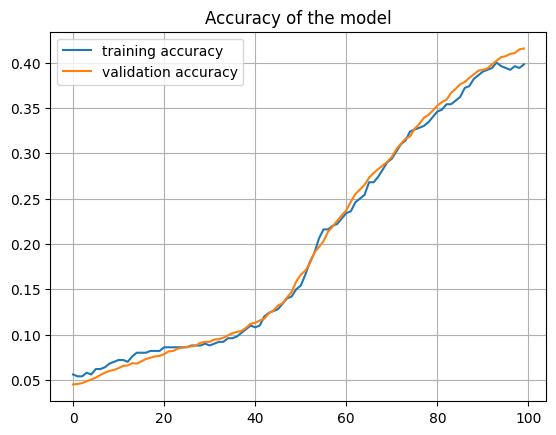

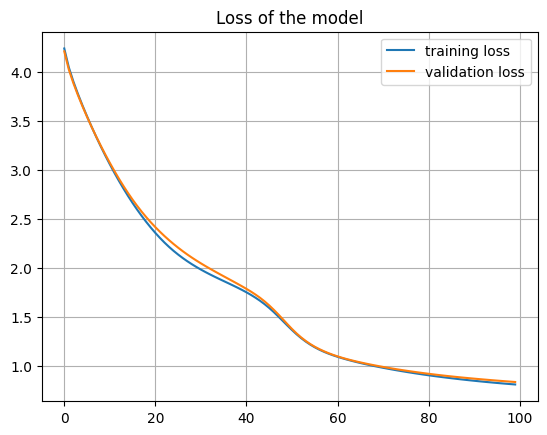

In [ ]:

Dic_optimizers = {"SGD":do_stochastic_gradient_descent(), "Momentum_GD":do_momentum_based_gradient_descent(), "NAG":do_nesterov_accelerated_gradient_descent(), "RMS_Prop":do_rmsprop(), "Adam":do_adam(), "Nadam":do_nadam()}

#################################################################
# Performing Scaling and Encoding transformations on the data

encoder = OneHotEncoder()
target_data = encoder.fit_transform(y_train, 10)
t_val = encoder.fit_transform(y_val, 10)
t_test = encoder.fit_transform(y_test, 10)
print("Done!")

X_scaled = X_scaled[:, :2000]
X_val_scaled = X_val_scaled[:, :500]
target_data = target_data[:,:2000]
t_val = t_val[:, :500]

#################################################################
layers = [Input_Layer(data=X_scaled),
          Dense_Layer(size=64, activation="Sigmoid", name="HL1"),
          Dense_Layer(size=10, activation="Sigmoid", name="OL")]

model = FeedForward_NeuralNetwork(layers=layers, batch_size=2000, optimizer="Nadam", \
                      initialization="random", loss="Squared_Error", \
                      epochs=int(100), target_data=target_data, X_val=X_val_scaled, t_val=t_val, \
                      wandblogging=False)

model.forward_propogation()
first_pass_y = model.layers[-1].y
model.backward_propogation()

acc_val, loss_val, _ = model.check_test(X_val_scaled, t_val)
acc_test, loss_test, _ = model.check_test(X_test_scaled, t_test)

print("-"*60)
print("Training Data")
print("Fraction Correctly classified in untrained network:", np.sum(np.argmax(first_pass_y, axis=0) == y_train[:2000])/2000)
print("Fraction Correctly classified in trained network:", np.sum(np.argmax((model.layers[-1].y), axis=0) == y_train[:2000])/2000)

print("-"*60)
print("Validation Data")
print("Fraction Correctly classified in trained network:", acc_val/t_val.shape[1])

print("-"*60)
print("Testing Data")
print("Fraction Correctly classified in trained network:", acc_test/t_test.shape[1])

#################################################################
plt.figure()
plt.plot(np.array(model.accuracy_hist_val)/500, label="training accuracy")
plt.plot(np.array(model.accuracy_hist)/2000, label="validation accuracy")
plt.title("Accuracy of the model")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(np.array(model.loss_hist)/2000, label="training loss")
plt.plot(np.array(model.loss_hist_val)/500, label="validation loss")
plt.title("Loss of the model")
plt.legend()
plt.grid()
plt.show()


## Q.4

In [ ]:

X_scaled = X_scaled[:, :6000]
X_test_scaled = X_test_scaled[:, :2000]
target_data = target_data[:, :6000]
t_test = t_test[:, :2000]

sweep_config = {"name": "complete-sweep", "method": "grid"}
sweep_config["metric"] = {"name": "loss", "goal": "minimize"}

parameters_dict = {
    "num_epochs": {"values": [5, 10]},
    "num_hidden_layers": {"values": [3, 4, 5]},
    "size_hidden_layer": {"values": [32, 64, 128]},
    "learning_rate": {"values": [1e-3, 1e-4]},
    "optimizer": {"values": ["SGD", "Momentum_GD", "NAG", "RMS_Prop", "Adam", "Nadam"]},
    "batch_size": {"values": [16, 32, 64]},
    "weight_init": {"values": ["random", "xavier"]},
    "activation": {"values": ["Sigmoid", "Tanh", "Relu"]},
    "loss": {"values": ["Cross_Entropy", "Squared_Error"]},
}

sweep_config["parameters"] = parameters_dict

for i in sweep_config:
    print(i, sweep_config[i])


def train_Neural_Network(config = sweep_config):
    print(config)
    with wandb.init(project="Assignment1", entity="cs6910jananiteam", config=config):
        config = wandb.init().config
        wandb.run.name = "e_{}_hl_{}_opt_{}_bs_{}_init_{}_ac_{}_loss_{}".format(config.num_epochs,\
                                                                          config.size_hidden_layer,\
                                                                          config.optimizer,\
                                                                          config.batch_size,\
                                                                          config.weight_init,\
                                                                          config.activation,\
                                                                          config.loss)

    layers = [Input_Layer(data=X_scaled),
              Dense_Layer(size=config["size_hidden_layer"], activation=config["activation"], name="HL1"),
              Dense_Layer(size=10, activation=config["activation"], name="OL")]

    new_model = FeedForward_NeuralNetwork(layers=layers, batch_size=config.batch_size, \
                                 optimizer=config.optimizer, initialization=config.weight_init, \
                                 epochs=config.num_epochs, target_data = target_data, X_val=X_val_scaled, \
                                 t_val=t_val, loss=config.loss, wandblogging=True)#, \
                                #  optim_params={"eta":config.learning_rate})

    new_model.forward_propogation()
    new_model.backward_propogation()
    acc_val, loss_val, _ = new_model.check_test(X_val_scaled, t_val)
    acc_test, loss_test, _ = new_model.check_test(X_test_scaled, t_test)

    wandb.log({"val_loss_end": loss_val/t_val.shape[1], \
                   "val_acc_end": acc_val/t_val.shape[1], \
                   "test_loss_end": loss_test/t_test.shape[1], \
                   "test_acc_end": acc_test/t_test.shape[1], \
                   "epoch":config.num_epochs})

# ####################################################################
sweep_id = wandb.sweep(sweep_config, project = "Assignment1")
wandb.agent(sweep_id, function = train_Neural_Network)
# #################################################################### [markdown]

name complete-sweep
method grid
metric {'name': 'loss', 'goal': 'minimize'}
parameters {'num_epochs': {'values': [5, 10]}, 'num_hidden_layers': {'values': [3, 4, 5]}, 'size_hidden_layer': {'values': [32, 64, 128]}, 'learning_rate': {'values': [0.001, 0.0001]}, 'optimizer': {'values': ['SGD', 'Momentum_GD', 'NAG', 'RMS_Prop', 'Adam', 'Nadam']}, 'batch_size': {'values': [16, 32, 64]}, 'weight_init': {'values': ['random', 'xavier']}, 'activation': {'values': ['Sigmoid', 'Tanh', 'Relu']}, 'loss': {'values': ['Cross_Entropy', 'Squared_Error']}}
Create sweep with ID: r61ya0um
Sweep URL: https://wandb.ai/lokendrakumar/Assignment1/sweeps/r61ya0um


wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
# Example configuration, replace this with your desired configuration
config = {

    "num_epochs": 1,
    "num_hidden_layers": 3,
    "size_hidden_layer": 64,
    "optimizer": "Adam",
    "batch_size": 4,
    "weight_init": "xavier",
    "activation": "Relu",
    "loss": "Cross_Entropy"
}

# Call the function with the specified configuration
train_Neural_Network(config)

{'num_epochs': 1, 'num_hidden_layers': 3, 'size_hidden_layer': 64, 'optimizer': 'Adam', 'batch_size': 4, 'weight_init': 'xavier', 'activation': 'Relu', 'loss': 'Cross_Entropy'}


100%|██████████| 1/1 [00:07<00:00,  7.25s/it]


## Q.7

In [ ]:
# sweep_config = {"name": "best-sweep", "method": "grid"}
# sweep_config["metric"] = {"name": "loss", "goal": "minimize"}

parameters_dict = {
    "num_epochs": {"values": [1]},
    "size_hidden_layer": {"values": [64]},
    "optimizer": {"values": ["Adam"]},
    "batch_size": {"values": [128]},
    "weight_init": {"values": ["xavier"]},
    "activation": {"values": ["Sigmoid"]},
    "loss": {"values": ["Cross_Entropy"]},
}

# Commented out sweep_config and parameters assignment
# sweep_config["parameters"] = parameters_dict

y_test_pred = 0

# Removed wandb related code
def train_nn(config):
    print(config)
    global y_test_pred

    layers = [Input_Layer(data=X_scaled),
              Dense_Layer(size=config['size_hidden_layer'], activation=config['activation'], name="HL1"),
              Dense_Layer(size=10, activation=config['activation'], name="OL")]

    New_model = FeedForward_NeuralNetwork(layers=layers, batch_size=config['batch_size'],
                             optimizer=config['optimizer'], initialization=config['weight_init'],
                             epochs=config['num_epochs'], target_data=target_data, X_val=X_val_scaled,
                             t_val=t_val, loss=config['loss'], wandblogging=True)

    New_model.forward_propogation()
    first_pass_y = New_model.layers[-1].y
    New_model.backward_propogation()
    acc_val, loss_val, _ = New_model.check_test(X_val_scaled, t_val)
    acc_test, loss_test, y_test_pred = New_model.check_test(X_test_scaled, t_test)

    # Removed wandb.log and wandb related code

    cf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf_matrix)
    plt.title("Confusion Matrix")

    data = [[x, y] for (x, y) in zip(y_test, y_test_pred)]

    return

    # Removed wandb.Table and wandb.sklearn.plot_confusion_matrix related code
    # print(y_test.shape, y_test_pred.shape)
    # test_images = X_test_scaled[y_test == y_test_pred]

# Commented out sweep_id and wandb.agent related code
# sweep_id = wandb.sweep(sweep_config, project="Assignment1")
# wandb.agent(sweep_id, function=train_nn)


        # wandb.log({"conf_mat" : wandb.plot.confusion_matrix(
        #                 probs=None,
        #                 y_true=y_test[:9000],
        #                 preds=y_test_pred,
        #                 class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])})


# sweep_id = wandb.sweep(sweep_config, project = "Assignment1")
# wandb.agent(sweep_id, function = train_nn)
#################################################################### [markdown]

{'num_epochs': 1, 'size_hidden_layer': 64, 'optimizer': 'Adam', 'batch_size': 4, 'weight_init': 'xavier', 'activation': 'Sigmoid', 'loss': 'Cross_Entropy'}


100%|██████████| 1/1 [00:09<00:00,  9.99s/it]


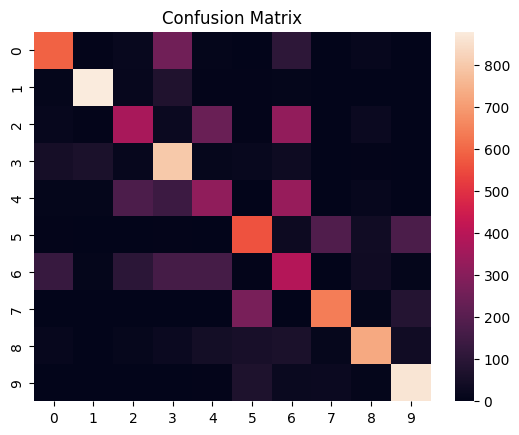

In [ ]:
# Sample configuration, replace it with the desired values
config = {
    "num_epochs": 1,
    "size_hidden_layer": 64,
    "optimizer": "Adam",
    "batch_size": 4,
    "weight_init": "xavier",
    "activation": "Sigmoid",
    "loss": "Cross_Entropy",
}

# Call the train_nn function with the configuration
train_nn(config)

## Q.10

In [ ]:

from keras.datasets import fashion_mnist, mnist

print("Loading data... ", end="")
[(x_train, train_y_labels), (x_test, test_y_labels)] = mnist.load_data()
x_train, x_val, train_y_labels, val_y_labels = train_test_split(x_train, train_y_labels, test_size=0.2, random_state=2)

print("Size of Training data:", x_train.shape)
print("Size of Validation data:", x_val.shape)

print("Performing Scaling and Encoding transformations on the data... ", end="")

normalizedX = x_train / 255
normalized_xval = x_val / 255
normalized_xtest = x_test / 255

normalizedX = normalizedX.reshape(normalizedX.shape[0], normalizedX.shape[1]*normalizedX.shape[2]).T
normalized_xval = normalized_xval.reshape(normalized_xval.shape[0], normalized_xval.shape[1]*normalized_xval.shape[2]).T
normalized_xtest = normalized_xtest.reshape(normalized_xtest.shape[0], normalized_xtest.shape[1]*normalized_xtest.shape[2]).T

encoder = OneHotEncoder()
target_data = encoder.fit_transform(y_train, 10)
t_val = encoder.fit_transform(y_val, 10)
t_test = encoder.fit_transform(y_test, 10)
print("Done!")



normalizedX = normalizedX
normalized_xval = normalized_xval
target_data = target_data
t_val = t_val


#################################################################
layers = [Input_Layer(data = normalizedX),
          Dense_Layer(size=128, activation="Relu", name="HiddenLayer1"),
          Dense_Layer(size=128, activation="Relu", name="HiddenLayer2"),
          Dense_Layer(size=128, activation="Relu", name="HiddenLayer2"),
          Dense_Layer(size=10, activation="Sigmoid", name="OutputLayer")]

DLModel = FeedForward_NeuralNetwork(layers=layers, batch_size=128, optimizer="Nadam", \
                      initialization="xavier", loss="Cross_Entropy", \
                      epochs=int(10), target_data=target_data, X_val=normalized_xval, t_val=t_val, \
                      wandblogging=False)

DLModel.forward_propogation()
SinglePass = DLModel.layers[-1].y
DLModel.backward_propogation()


#################################################################


acc_val, loss_val, _ = DLModel.TestingData(normalized_xval, t_val)
acc_test, loss_test, _ = DLModel.TestingData(normalized_xtest, t_test)

print('-------------------------------')
print("Training Data")
print("Fraction Correctly classified in untrained network:", np.sum(np.argmax(SinglePass, axis=0) == train_y_labels[:2000])/2000)
print("Fraction Correctly classified in trained network:", np.sum(np.argmax((DLModel.layers[-1].y), axis=0) == train_y_labels[:2000])/2000)

print('-------------------------------')
print("Validation Data")
print("Fraction Correctly classified in trained network:", acc_val/t_val.shape[1])

print('-------------------------------')
print("Testing Data")
print("Fraction Correctly classified in trained network:", acc_test/t_test.shape[1])

#################################################################
plt.figure()
plt.plot(np.array(DLModel.accuracy_hist_val)/500, label="training accuracy")
plt.plot(np.array(DLModel.accuracy_hist)/2000, label="validation accuracy")
plt.title("Accuracy of the model")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(np.array(DLModel.loss_hist)/2000, label="training loss")
plt.plot(np.array(DLModel.loss_hist_val)/500, label="validation loss")
plt.title("Loss of the model")
plt.legend()
plt.grid()
plt.show()

Loading data... Size of Training data: (48000, 28, 28)
Size of Validation data: (12000, 28, 28)
Performing Scaling and Encoding transformations on the data... Done!


 10%|█         | 1/10 [07:30<1:07:37, 450.82s/it]


KeyboardInterrupt: 